#### Implementacion de geopandas y earthpy para graficar el mapa de Paraguay, y en el las ubicaciones de las descargas eléctricas ocurridas el dia 01-Junio-2022
Acceso a los datos a través del uso de pandas y geopandas, en formato GeoDataFrame para manipular mejor los archivos shape.

In [2]:
##Importando librerias
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from matplotlib.colors import ListedColormap
import geopandas as gpd
from shapely.geometry import Point
from shapely.geometry import box
import pandas as pd
import fiona
import earthpy as et
import seaborn as sns
import warnings

warnings.filterwarnings('ignore','Geoseries.notna', UserWarning)

#Configuracion de graficas
sns.set(font_scale = 1.5, style ='whitegrid')

#Directorio de trabajo
os.chdir(os.path.join(et.io.HOME,'earth-analytics'))

In [9]:
#Acceso a datos
wB_path = os.path.join('data','earthpy-downloads','spatial-vector-lidar',
                      'global', 'ne_110m_land','ne_110m_land.shp')
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

#Archivos shapefile Paraguay
pais_path = os.path.join('data', 'earthpy-downloads', 'paraguay-descargas','paraguay_mapas' ,'contorno_Paraguay.shp')
dpto_path = os.path.join('data', 'earthpy-downloads', 'paraguay-descargas','paraguay_mapas', 'PAIS','Departamentos_Paraguay.shp')
ciud_path = os.path.join('data', 'earthpy-downloads', 'paraguay-descargas','paraguay_mapas' ,  'PAIS','Ciudades_Paraguay.shp')

distritos_py = gpd.read_file(pais_path)
dptos_py = gpd.read_file(dpto_path)
ciud_py = gpd.read_file(ciud_path)
py = gpd.read_file(pais_path)
dptos_py

,DPTO,DPTO_DESC,geometry
0,00,ASUNCIÓN,"POLYGON ((-57.56162 -25.22836, -57.56109 -25.2..."
1,01,CONCEPCIÓN,"POLYGON ((-57.95380 -22.08754, -57.95299 -22.0..."
2,02,SAN PEDRO,"POLYGON ((-56.18908 -23.30411, -56.18826 -23.3..."
3,03,CORDILLERA,"POLYGON ((-56.94932 -24.84328, -56.86032 -24.8..."
4,04,GUAIRÁ,"POLYGON ((-56.31547 -25.56620, -56.31477 -25.5..."
5,05,CAAGUAZÚ,"POLYGON ((-55.17492 -24.46719, -55.16387 -24.4..."
6,06,CAAZAPÁ,"POLYGON ((-55.47520 -25.52722, -55.47482 -25.5..."
7,07,ITAPÚA,"POLYGON ((-55.31368 -26.09268, -55.31353 -26.0..."
8,08,MISIONES,"POLYGON ((-57.08171 -26.37769, -57.07895 -26.3..."
9,09,PARAGUARÍ,"POLYGON ((-57.19370 -25.40545, -57.19212 -25.4..."


##### Shapefiles obtenidos de  https://www.ine.gov.py/microdatos/cartografia-digital-2012.php

In [12]:
#Contorno de Paraguay
#Creando un shapefile para el contorno ya que no existia entre los archivos
#referentes al pais
dptos = gpd.GeoDataFrame(dptos_py)
dptos2 = dptos.assign(DPTO = 0)
dptos2 = dptos2[['DPTO','geometry']]
cont = dptos2.dissolve(by = 'DPTO')
#cont.to_file('contorno_Paraguay.shp')

In [13]:
## Centroide de los poligones que representan a los departamentos
# Para poder centrar en el mapa los nombres de cada dpto.
centr= dptos.assign(geometry = dptos['geometry'].centroid)
centr


C:\Users\AgOvi\AppData\Local\Temp\ipykernel_18232\4102190837.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centr= dptos.assign(geometry = dptos['geometry'].centroid)


,DPTO,DPTO_DESC,geometry
0,00,ASUNCIÓN,POINT (-57.60496 -25.29126)
1,01,CONCEPCIÓN,POINT (-57.10984 -22.84056)
2,02,SAN PEDRO,POINT (-56.63093 -24.17700)
3,03,CORDILLERA,POINT (-56.96185 -25.21116)
4,04,GUAIRÁ,POINT (-56.30053 -25.83116)
5,05,CAAGUAZÚ,POINT (-55.88618 -25.20004)
6,06,CAAZAPÁ,POINT (-56.05660 -26.24193)
7,07,ITAPÚA,POINT (-55.75998 -26.84082)
8,08,MISIONES,POINT (-57.09452 -26.91664)
9,09,PARAGUARÍ,POINT (-57.13719 -26.05788)


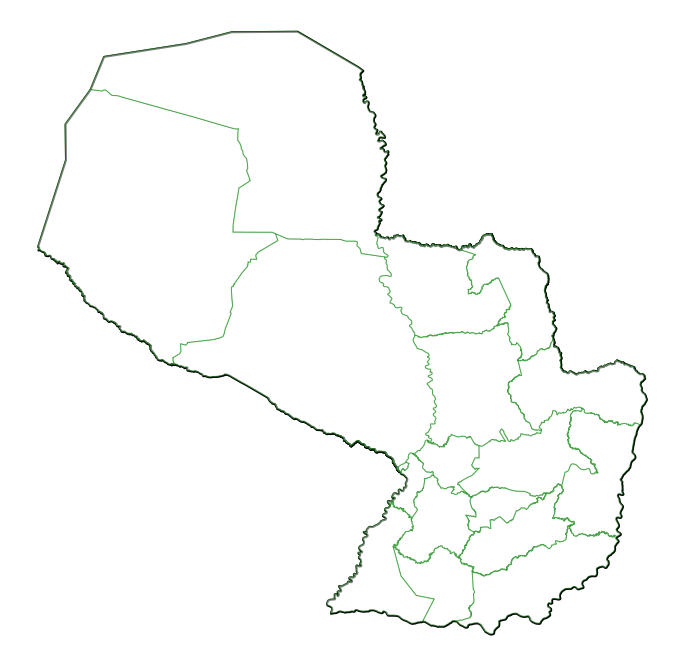

In [14]:
# Grafico del contorno y departamentos del Paraguay
fig, ax = plt.subplots(figsize=(12, 12))
py.plot(color='white', edgecolor = 'black',ax=ax, linewidth=2)
dptos_py.plot( ax=ax,
alpha=.5, edgecolor = 'green', facecolor = 'white')
ax.set_axis_off()
plt.axis('equal')

plt.show()

In [15]:
#Acceso a datos de descargas electricas del Paraguay en un dia
descargas_py = pd.read_csv(os.path.join(et.io.HOME,'earth-analytics', 'data','earthpy-downloads','paraguay.csv'))
print(descargas_py)
coordinates = gpd.points_from_xy(descargas_py.Longitude, descargas_py.Latitude)
descargas_gpd = gpd.GeoDataFrame(data = descargas_py, geometry = coordinates)
descargas_gpd


                     LightningTime  Latitude  Longitude  Height  FlashType  \
0    2022-06-01T11:39:46.020149513 -25.06598  -55.48972       0          0   
1    2022-06-01T11:39:47.434044794 -25.63992  -55.01918    7134          1   
2    2022-06-01T11:39:49.433415065 -24.87441  -55.40839       0          0   
3    2022-06-01T11:39:50.661510893 -25.89717  -55.13200    4576          1   
4    2022-06-01T11:39:56.733833993 -26.41831  -53.60144   12384          1   
..                             ...       ...        ...     ...        ...   
348  2022-06-01T11:39:41.486678448 -26.12104  -53.56278   16056          1   
349  2022-06-01T11:39:41.956948994 -24.80540  -52.70646   15723          1   
350  2022-06-01T11:39:42.375866763 -24.47835  -52.88748       0          0   
351  2022-06-01T11:39:42.592462292 -25.70044  -53.42996       0          0   
352  2022-06-01T11:39:45.971641205 -25.91745  -54.17159    8238          1   

     Amplitude  
0        13177  
1        37518  
2       -342

,LightningTime,Latitude,Longitude,Height,FlashType,Amplitude,geometry
0,2022-06-01T11:39:46.020149513,-25.06598,-55.48972,0,0,13177,POINT (-55.48972 -25.06598)
1,2022-06-01T11:39:47.434044794,-25.63992,-55.01918,7134,1,37518,POINT (-55.01918 -25.63992)
2,2022-06-01T11:39:49.433415065,-24.87441,-55.40839,0,0,-34234,POINT (-55.40839 -24.87441)
3,2022-06-01T11:39:50.661510893,-25.89717,-55.13200,4576,1,11893,POINT (-55.13200 -25.89717)
4,2022-06-01T11:39:56.733833993,-26.41831,-53.60144,12384,1,-3608,POINT (-53.60144 -26.41831)
...,...,...,...,...,...,...,...
348,2022-06-01T11:39:41.486678448,-26.12104,-53.56278,16056,1,6413,POINT (-53.56278 -26.12104)
349,2022-06-01T11:39:41.956948994,-24.80540,-52.70646,15723,1,12861,POINT (-52.70646 -24.80540)
350,2022-06-01T11:39:42.375866763,-24.47835,-52.88748,0,0,-31497,POINT (-52.88748 -24.47835)
351,2022-06-01T11:39:42.592462292,-25.70044,-53.42996,0,0,-111198,POINT (-53.42996 -25.70044)


C:\Users\AgOvi\AppData\Local\Temp\ipykernel_6656\3725630441.py:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4674

  descargas_clip=gpd.clip(descargas_gpd,py)


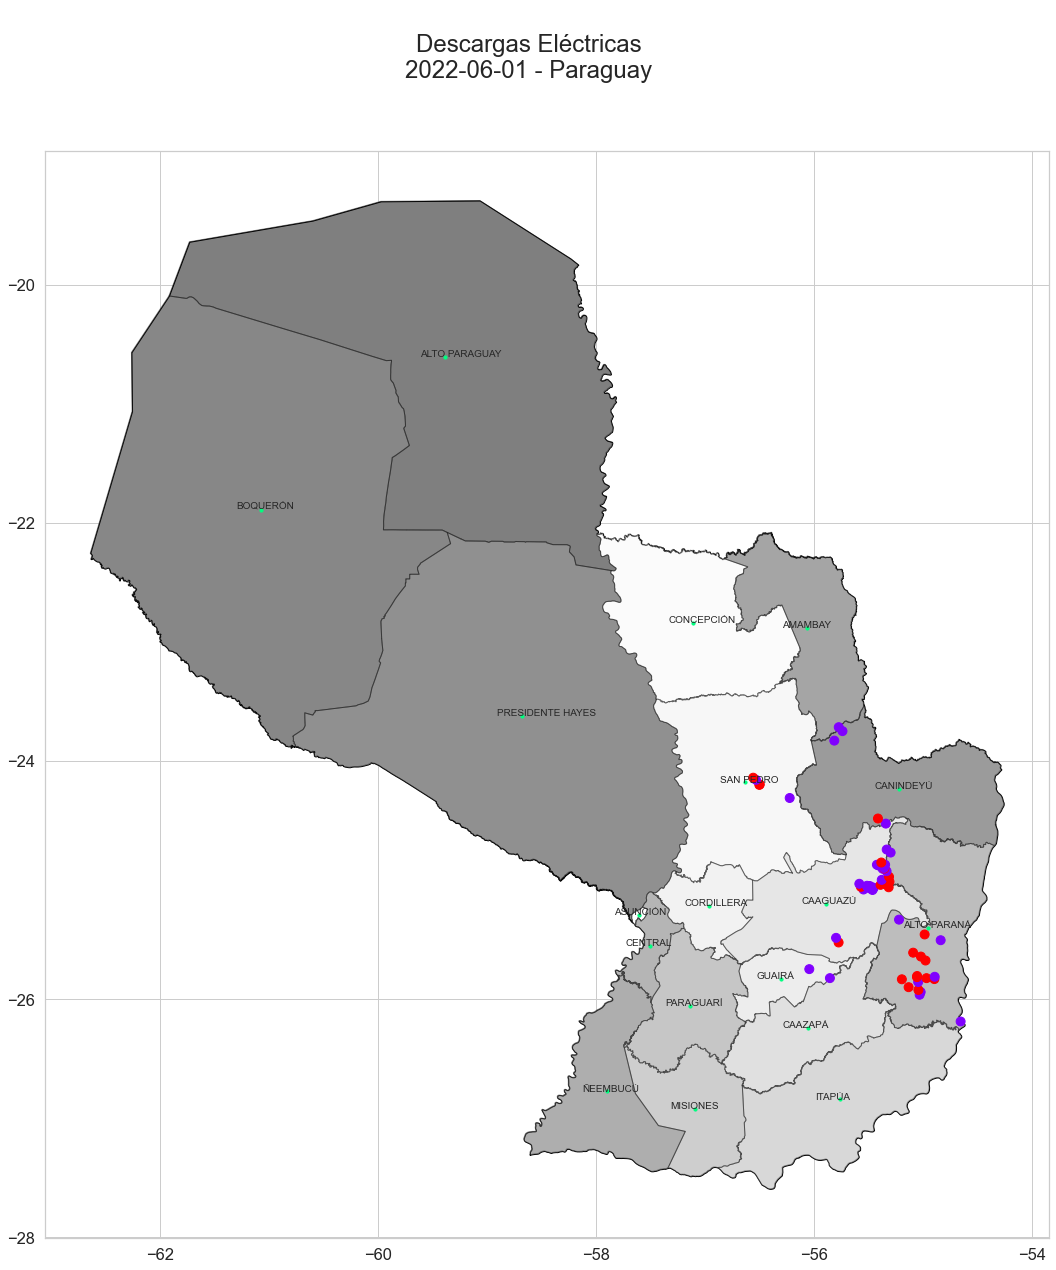

In [7]:
#Recortando los datos de descargas respecto al contorno del país
descargas_clip=gpd.clip(descargas_gpd,py)
#Grafica de los tipos de descargas ubicados en el mapa
f, ax = plt.subplots(figsize=(20,20))
py.plot(color='white', edgecolor = 'black',ax=ax, legend=True)
dptos_py.plot( ax=ax,
alpha=.5, edgecolor = 'k', cmap = 'Greys')
descargas_clip.plot(ax=ax, column='FlashType', markersize = 80, cmap = 'rainbow')
centr.plot(markersize=10, color = 'springgreen', ax=ax)
# Label each point - note this is just shown here optionally but is not required for your homework
centr.apply(lambda x: ax.annotate(text=x['DPTO_DESC'],
                                        xy=x.geometry.coords[0],
                                        xytext=(-25,0), textcoords="offset points"),
                  axis=1)
f.suptitle('\nDescargas Eléctricas\n2022-06-01 - Paraguay', fontsize = 24)
plt.show()